# Notebook to identify values in datasets

This notebook can be used to identify values that are being discussed in a text corpus. This is done based on a list of 432 values and related keywords.

As values are identified based on keywords (instead of topic models), we can't yet say anything about the importance of values in the dataset (only whether they appear or not).

## 1. Import packages and datasets

### 1.1. Import packages

In [17]:
import sys, string, re
import pprint
import os
import pandas as pd
import dateutil.parser
import matplotlib.pyplot as plt
import spacy
#from keybert import KeyBERT
from corextopic import vis_topic as vt
from scipy.ndimage.filters import gaussian_filter1d
from matplotlib.ticker import FormatStrFormatter

import nltk
nltk.download('averaged_perceptron_tagger')

%matplotlib inline

sys.path.append('./code')

from convert_to_df import *
from make_topic_model import *
from create_visualisation import *
#from import_topic_model import *

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\tewdewildt\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


### 1.2. Import dataset to analyze

Change the file_name if you want to use another dataset. The file needs to be place in the data folder (...\ValueMonitor\data)

In [20]:
file_name = "data2.csv"

columns_to_select_as_text = ["Title", "Abstract", "Author Keywords"]
column_as_date = ["Year"]
other_columns_to_keep = ["Authors", "Source title", "Energy transition domain"]
list_columns_to_keep = [columns_to_select_as_text, column_as_date, other_columns_to_keep]

'''--------------------------------------------------------------------------''' 

#df = convert_to_df(file_name, list_columns_to_keep)
df = convert_to_df(file_name)
#df["[Text_for_analysis]"] = df["[Text_for_analysis]"].str.lower()
df.info()

C:\Users\tewdewildt\surfdrive\ValueMonitor_Prototype/data/data2.csv


KeyError: "['[Date]'] not in index"

### 1.3. import the dictionary containing 432 values and synonyms

In [3]:
df_synonyms = pd.read_pickle("save/Dictionary_value_synonyms_updated")

## 2. Identify values

### 2.1. Calculate value frequencies

Here we make a dataframe where the occurence of values is calculated.

In [4]:
df_documents_values = pd.DataFrame(
        columns=df_synonyms['Values'].tolist()
    ).astype(float)
df_documents_values

def find_keyword_in_text(text, list_keywords):
    keyword_found = 0
    if any(x in text for x in list_keywords):
        keyword_found = 1
    return keyword_found
    
for index, row in df_synonyms.iterrows():
    list_keywords = row['Synonyms'].split("|")
    value = row['Values']  
    df_documents_values[value] = df['[Text_for_analysis]'].apply(lambda row: find_keyword_in_text(row, list_keywords))

df_documents_values['Energy transition domain'] = df['Energy transition domain']

In [5]:
df_documents_values

,Above and Beyond,Acceptance,Accessibility,Accomplishment,Accountability,Accuracy,Achievement,Activity,Adaptability,Adventure,...,Wealth,Welcoming,Well-being,Willfulness,Winning,Wisdom,Wonder,Work/Life Balance,Worldwide,Energy transition domain
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,Environmental biology
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Environmental biology
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Environmental biology
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Environmental biology
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,Environmental biology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28030,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Sustainable mobility
28031,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Sustainable mobility
28032,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Sustainable mobility
28033,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Sustainable mobility


### 2.2. Visualise most frequent values

The relative frequence of values is calculated based on keywords, not topics. The graph is therefore mostly an indicator about the presence of values, not their relative importance.

In [20]:
selected_field = 'Sustainable mobility'

# 'Environmental economics', 'Environmental biology', 'Philosophy of sustainability', 'Environmental sustainability',
#  'Sustainable building', 'Environmental psychology', 'Sustainable finance', 'Sustainable mobility'

'''----------------------------------------'''

df_documents_values_selected_field = df_documents_values.loc[df['Energy transition domain'] == selected_field]
df_documents_values_selected_field = df_documents_values_selected_field.drop(['Energy transition domain'], axis=1)
df_documents_values_all = df_documents_values.drop(['Energy transition domain'], axis=1)

Learning          502
Sustainability    474
Results           460
Growth            359
Exploration       339
Environment       328
Impact            322
Potential         306
Development       269
Best              256
dtype: int64


Text(0.5, 1.0, '10 most frequent values in entire dataset by keyword search')

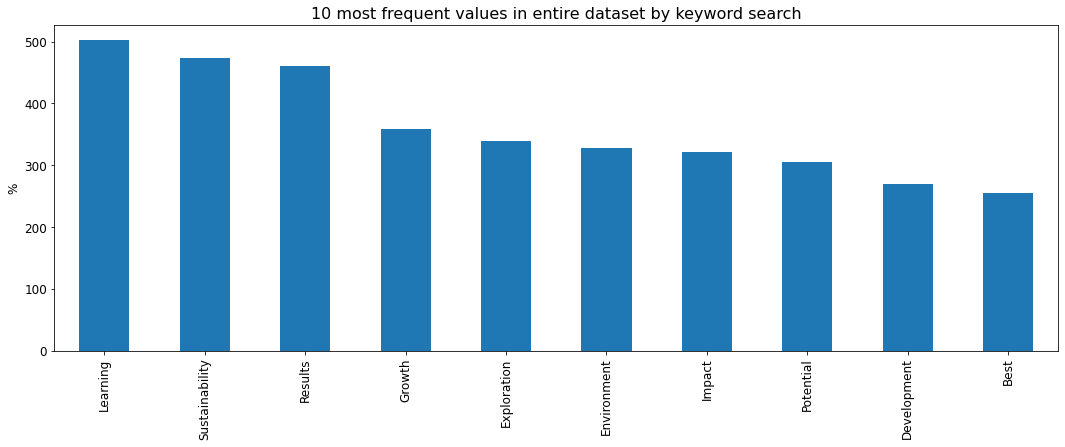

In [21]:
x_most_frequent_values_to_select = 10

''' ------------------------------------------------ '''

#df_counts = df_documents_values_all.sum()
df_counts = df_documents_values_selected_field.sum()
df_counts = df_counts.sort_values(ascending=False)
df_counts = df_counts[:x_most_frequent_values_to_select]
print(df_counts)

plt.rcParams.update({'font.size': 12})
ax = df_counts.plot(kind='bar', figsize=(18,6))
ax.set_ylabel("%")
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
#plt.title(str(x_most_frequent_values_to_select)+" most frequent values in '"+str(selected_field)+"' by keyword search", fontdict={'fontsize': 16})
plt.title(str(x_most_frequent_values_to_select)+" most frequent values in entire dataset by keyword search", fontdict={'fontsize': 16})

In [27]:
Value = 'Spirituality'

display(df_synonyms.loc[df_synonyms['Values'] == Value].to_string())

'           Values                                                                                                                                                                 Synonyms\n377  Spirituality   spiritualty | spiritism | spirituality | otherworldliness | spiritualism | inspirit | feeling | life | sprightliness | disembodied spirit | spirit | feel | spiritual '

### 2.3. Explore which documents are attributed to different values.

Next we can visualise which documents are found for different values. Select the value to investigate at 'selected_value'. You can also change the size of the sample.

In [32]:
selected_value = "Spirituality"
size_sample = 10
show_keywords = False # True, False
show_extracts = True # True, False
window = 10


''' ---------------------------------------'''

df_documents_values_test_selected = df_documents_values.loc[df_documents_values[selected_value] > 0]
selected_indexes = list(df_documents_values_test_selected.index.values) 

df_selected_articles = df[df.index.isin(selected_indexes)]

df_synonyms_indexed = df_synonyms.set_index('Values')
sampled_df = df_selected_articles.sample(n = size_sample)
for index, row in sampled_df.iterrows():
    print('\033[1m' + 'Article '+str(index) + '\033[0m')
    print("Title: "+str(row['Title']))
    
    text_combined = row['[Text_for_analysis]']
    if show_keywords == True:
        generated_keywords = kw_model.extract_keywords(text_combined, keyphrase_ngram_range=(1, 1), stop_words=None, top_n=10)
        print("Most important keywords in this document:")
        for keyword in generated_keywords:
            print("  - "+str(keyword[0]))
    print("")
    if show_extracts == True:
        print("Keywords related to "+str(selected_value)+" found in text:")
        tokens = text_combined.split() #### check here with spaces
        keywords = df_synonyms_indexed.at[selected_value, 'Synonyms']
        keywords = keywords.split("|")
        list_keywords_split_replaced = []
        for keyword in keywords:
            if keyword[-1] == ' ':
                keyword = keyword[:-1]
            if keyword[0] == ' ':
                keyword = keyword[1:]
            list_keywords_split_replaced.append(keyword)
        keywords = list_keywords_split_replaced
        for index in range(len(tokens)):
            if tokens[index].lower() in keywords:
                start = max(0, index-window)
                finish = min(len(tokens), index+window+1)
                lhs = " ".join( tokens[start:index] )
                rhs = " ".join( tokens[index+1:finish] )
                conc = "%s [%s] %s" % (" - "+str(lhs), '\033[1;31m' + str(tokens[index]) + '\033[0m', rhs)
                print(conc)
                print("")
    print("")

Article 24890
Title: Effect of mineral admixture on CO2 emissions and absorption in relation to service life and varying CO2 concentrations

Keywords related to Spirituality found in text:
 - admixture on co2 emissions and absorption in relation to service [life] and varying co2 concentrations carbonation is a critical deterioration phenomenon

 - evaluation of co2 emissions and absorption with varying intended service [life] periods based on actual geometry and mix ratios of concrete

 - the co2 amount are also performed for varying intended service [life] periods and co2 concentrations as the intended service life increases

 - service life periods and co2 concentrations as the intended service [life] increases the co2 emission rapidly increases due to the repeated

 - concrete the effect of absorption increases with an increasing service [life] and a higher exterior co2 concentration in the given period


Article 19671
Title: Energy learning curves of PV systems

Keywords related to